Create scatterplot of (x-axis - latitude, y-axis - peak time last winter)
--maybe make same plot for southern hemisphere
--maybe make same plot for troughs in summers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import signal

In [7]:
# data = pd.read_csv('data/locdata.csv')
# coords = pd.read_csv('data/loccords.csv')
# data = pd.read_csv('data/TexasData.csv')
# coords = pd.read_csv('data/TexasCords.csv', thousands=',').sort_values(by='Lat')
# coords['Population'] = pd.to_numeric(coords['Population'])
data = pd.read_csv('data/TexasGroupsData0.5.csv')
coords = pd.read_csv('data/TexasCountyGroupings0.5.csv')

In [5]:
#for grouping locations by latitude and population
data = pd.read_csv('data/TexasData.csv')
coords = pd.read_csv('data/TexasCords.csv', thousands=',').sort_values(by='Lat')
coords['Population'] = pd.to_numeric(coords['Population'])
groups = {}
groupsdata = {}
group = ""
groupdata = np.zeros(643)
curpop = 0
firstlat = 26.14524221 #latitude of southern-most county in TX
latavg = 0
groupnum = 0
for i, row in coords.iterrows():
    lat = row['Lat']
    place = row['Place']
    if lat > firstlat+0.5:
        groups[group] = (latavg / groupnum, curpop)
        groupsdata[group] = groupdata
        group = place
        curpop = row['Population']
        firstlat +=0.5
        latavg = lat
        groupdat = data[place]
        groupnum = 1
#     elif (curpop > 150000):
#         groups[group] = (latavg / groupnum, curpop)
#         groupsdata[group] = groupdata
#         group = place
#         curpop = row['Population']
#         firstlat = lat
#         latavg = lat
#         groupdat = data[place]
#         groupnum = 1
    else:
        curpop += row['Population']
        latavg += lat
        groupnum += 1
        groupdata = groupdata + data[place]
        group = group + ', ' + place
        
# for i in range(10):
#     lat = firstlat + i
#     group = data[coords['Lat'] > lat & coords['Lat'] < lat+1]
#     print(group)
pd.DataFrame(data=groups).to_csv('TexasCountyGroupings0.5.csv')
pd.DataFrame(data=groupsdata).to_csv('TexasGroupsData0.5.csv')
    

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2021-01-20 00:00:00')]


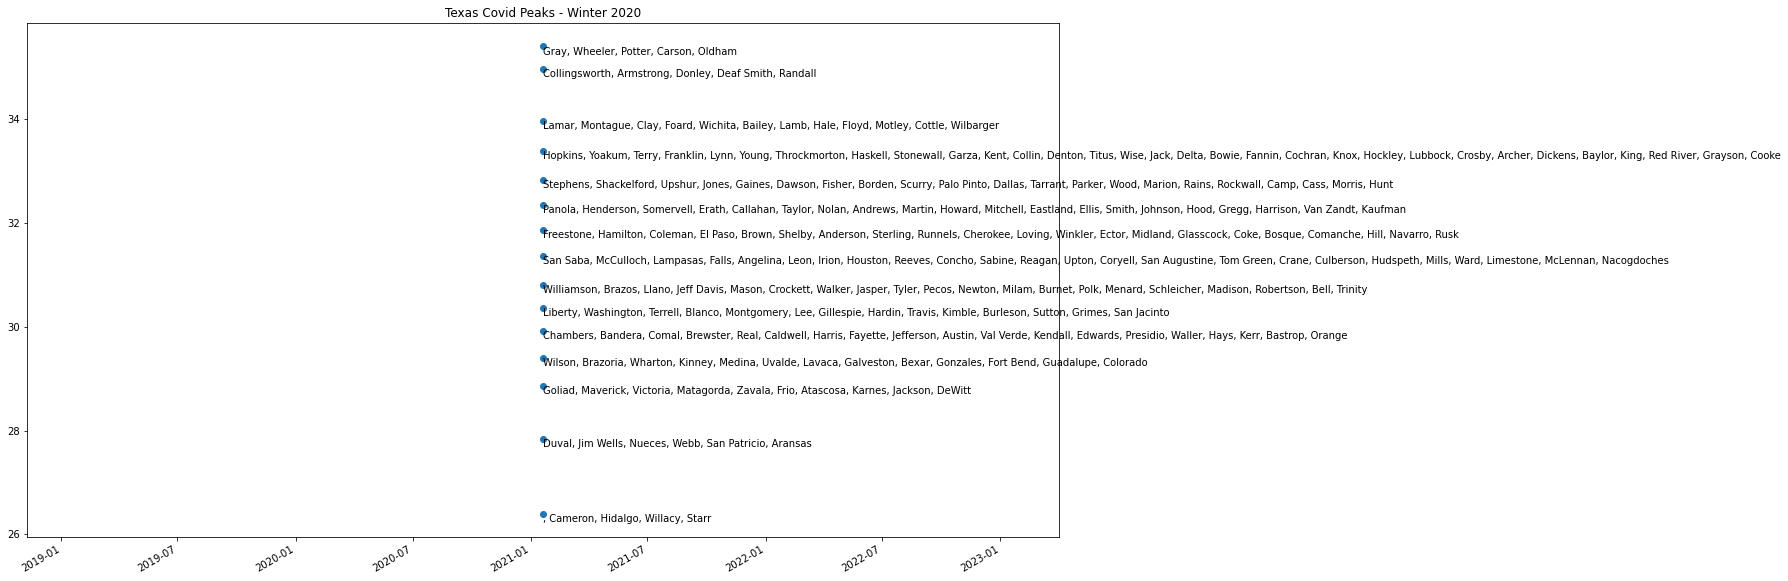

In [10]:
# latrange = [30,60]
# latdata = coords[['Place','Lat']][(coords['Lat'] > latrange[0]) & (coords['Lat'] < latrange[1])]
good_states = ['Harris, Texas', 'Wisconsin', 'North Dakota', 'South Dakota', 'Tennessee', 'Ohio']
ok_states = ['Florida', 'Illinois', 'Colorado', 'Oregon', 'North Carolina', 'Montana', 'Pennsylvania']
states = good_states + ok_states
states = [state + ', US' for state in states]

countries = ['Turkey', 'Israel', 'France', 'Ukraine']
countries = [country + ', ' + country for country in countries]

# places = states + countries
# latdata = coords[['Place','Lat']][coords['Place'].isin(places)]

good_counties = ['Andrews', 'Bailey', 'Baylor', 'Harris', 'Travis', 'Crockett', 'Edwards', 'Frio', 'Nueces', 'Fayette']
ray_counties = ['Potter', 'Dallas', 'Hidalgo', 'Cameron']

# places = good_counties + ray_counties
# latdata = coords[['Place','Lat']][coords['Place'].isin(places)]
latdata = coords[['Place','Lat']][coords['Population'] > 150000]
latdata = latdata[latdata['Place'] != 'Sherman']
    
dates = list(pd.to_datetime(data['Date']))

placeout = []
lats = []
peaks = []
window = [253,376] #10/1/20 - 2/1/21

for i, row in latdata.iterrows():
    place = row['Place']; lat = row['Lat'];
    locd = data[place].rolling(window=30, center=True).mean() 
    winter = locd[window[0]:window[1]] 
    
    avg = np.mean(winter)
    peak, _ = signal.find_peaks(winter, height=1.5*avg, distance=200) #only want one peak
    trough, _ = signal.find_peaks(-winter, distance=200)
#     half_width = signal.peak_widths(locd, peaks, rel_height=1)[0]  # peak width at half maximum
    if peak.size > 0:
        placeout.append(place)
        lats.append(lat)
        peaks.append(peak[0] + window[0])
        #if you want to plot each individual location
#         plt.plot(dates[window[0]:window[1]], winter)
#         plt.plot(dates[peaks[-1]], winter[peaks[-1]], 'r.')

#fit line to data
m, b = np.polyfit(peaks, lats, 1); line = [peak*m + b for peak in peaks]
#convert peak indeces to dates
peaks = [dates[i] for i in peaks]
print(peaks)
#plot output
fig, ax = plt.subplots()
ax.scatter(peaks, lats)

#label scatterpoints
for i, txt in enumerate(placeout):
    ax.annotate(txt, (peaks[i], lats[i]), horizontalalignment='left', verticalalignment='top')
ax.plot(peaks, line, ':')
ax.set_title('Texas Covid Peaks - Winter 2020')
#format x-axis to datetime
fig.autofmt_xdate()

# Text in the x axis will be displayed in 'YYYY-mm' format.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

#save plot
plt.savefig('Peakcompare_Latwindow1.png' , dpi=100)


In [ ]:
dates = list(pd.to_datetime(data['Date']))
dallas = data['Dallas'].rolling(window=7).mean()

fig, ax = plt.subplots()
ax.plot(dates, dallas, '-')
ax.set_title('Dallas Covid Cases - 2020/2021')
#format x-axis to datetime
fig.autofmt_xdate()

#set figure size
fig.set_size_inches(18.5, 10.5, forward=True)

#save plot
# plt.savefig('Dallas.png' , dpi=100)